<a href="https://colab.research.google.com/github/Daivar/Deep_Learning_Models/blob/main/CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib as plt
import numpy as np

In [29]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [30]:
X_test.shape

(10000, 32, 32, 3)

In [31]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

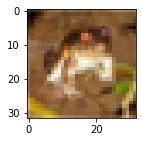

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,2))
plt.imshow(X_train[0])

In [33]:
y_train.shape

(50000, 1)

In [34]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [35]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [36]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [37]:
classes[2]

'bird'

In [38]:
def plot_sample(X, y, index):
   plt.figure(figsize = (15,2))
   plt.imshow(X[index])
   plt.xlabel(classes[y[index]])

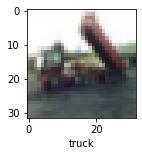

In [39]:
plot_sample(X_train, y_train, 2)

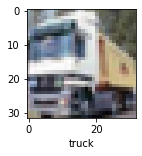

In [15]:
plot_sample(X_train, y_train, 1)

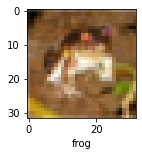

In [16]:
plot_sample(X_train, y_train, 0)

In [40]:
X_train[0]/255

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [41]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [42]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [43]:
X_train_scaled

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [44]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32'
)


In [45]:
y_train[0:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [46]:
y_train_categorical[0:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [47]:
### Model building, training
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.layers import Dense

model = keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')    
    ])

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 118s 75ms/step - loss: 1.8107 - accuracy: 0.3522


In [48]:
### Predictions

np.argmax(model.predict(X_test_scaled)[0])

3

In [49]:
y_test[0]

array([3], dtype=uint8)

In [50]:
def get_model():
    model = keras.Sequential([
            keras.layers.Flatten(input_shape=(32,32,3)),
            keras.layers.Dense(3000, activation='relu'),
            keras.layers.Dense(1000, activation='relu'),
            keras.layers.Dense(10, activation='sigmoid')    
        ])

    model.compile(optimizer='SGD',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [51]:
%%timeit -n1 -r1 
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 114s 73ms/step - loss: 1.8103 - accuracy: 0.3544
Epoch 2/10
1563/1563 [==============================] - 115s 74ms/step - loss: 1.6230 - accuracy: 0.4279
Epoch 3/10
1563/1563 [==============================] - 116s 74ms/step - loss: 1.5400 - accuracy: 0.4567
Epoch 4/10
1563/1563 [==============================] - 116s 74ms/step - loss: 1.4812 - accuracy: 0.4772
Epoch 5/10
1563/1563 [==============================] - 117s 75ms/step - loss: 1.4311 - accuracy: 0.4957
Epoch 6/10
1563/1563 [==============================] - 115s 74ms/step - loss: 1.3895 - accuracy: 0.5095
Epoch 7/10
1563/1563 [==============================] - 113s 72ms/step - loss: 1.3528 - accuracy: 0.5243
Epoch 8/10
1563/1563 [==============================] - 112s 71ms/step - loss: 1.3155 - accuracy: 0.5397
Epoch 9/10
1563/1563 [==============================] - 112s 72ms/step - loss: 1.2820 - accuracy: 0.5512
Epoch 10/10
1563/1563 [==============================] 

In [52]:
cnn = models.Sequential([
        # cnn
        layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
        layers.MaxPooling2D(2,2),
        
        layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
        layers.MaxPooling2D(2,2),

        #dence
        keras.layers.Flatten(),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(10, activation='softmax')    
    ])


In [53]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [54]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 55s 35ms/step - loss: 2.2038 - accuracy: 0.2651
Epoch 2/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.5327 - accuracy: 0.4473
Epoch 3/10
1563/1563 [==============================] - 53s 34ms/step - loss: 1.3428 - accuracy: 0.5215
Epoch 4/10
1563/1563 [==============================] - 54s 35ms/step - loss: 1.2176 - accuracy: 0.5678
Epoch 5/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.1249 - accuracy: 0.6040
Epoch 6/10
1563/1563 [==============================] - 53s 34ms/step - loss: 1.0435 - accuracy: 0.6347
Epoch 7/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.9798 - accuracy: 0.6572
Epoch 8/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.9229 - accuracy: 0.6764
Epoch 9/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.8788 - accuracy: 0.6938
Epoch 10/10
1563/1563 [==============================] - 53s 34m

In [55]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 4s 11ms/step - loss: 1.1680 - accuracy: 0.6139


[1.1679867506027222, 0.6139000058174133]

In [56]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

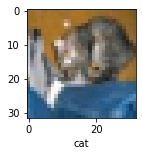

In [57]:
plot_sample(X_test, y_test, 0)

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[0.01619699, 0.00772227, 0.09869189, 0.12815402, 0.45234033,
        0.06197492, 0.18176025, 0.03070387, 0.01182325, 0.01063221],
       [0.01661032, 0.00673276, 0.10172566, 0.13605087, 0.4533586 ,
        0.06629908, 0.16492197, 0.03424446, 0.01022886, 0.00982752],
       [0.01499812, 0.00661323, 0.10055552, 0.13749333, 0.45489955,
        0.06483586, 0.17037924, 0.0319363 , 0.00945184, 0.00883698],
       [0.01571478, 0.00606324, 0.09834708, 0.12908678, 0.47957176,
        0.06420854, 0.1573275 , 0.03270422, 0.00880086, 0.00817529],
       [0.01410421, 0.00637559, 0.09895673, 0.12100366, 0.47026286,
        0.05814911, 0.18679544, 0.02705065, 0.00908125, 0.0082205 ]],
      dtype=float32)

In [ ]:
np.argmax([5,12,167,2])

2

In [ ]:
np.argmax(y_pred[0])

4

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[4, 4, 4, 4, 4]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)